In [13]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.datasets import mnist

import visualkeras
# loading dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X = np.concatenate([X_train, X_test], axis = 0)
y = np.concatenate([y_train, y_test], axis = 0)

# reshapring 
X = X.reshape(X.shape[0], 28, 28, 1) 

# casting to float 
X.astype('float32')

# normalizing 
X = X / 255

# encoding output values
y = to_categorical(y)
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 6
EPOCHS = 2
VERBOSE = 2
K_FOLDS = 10
def create_model():
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
    model.add(MaxPool2D((2,2)))

    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D((2,2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))
    
    model.compile(
        optimizer='adam', 
        loss='categorical_crossentropy', 
        metrics=['accuracy']
    )
    
    return model
model = create_model()
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 1600)              0         
                                                                 
 dense_39 (Dense)            (None, 128)             

In [4]:
scores = []
models = []

for i in range(K_FOLDS):
    print("Training on Fold: ",i+1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3
                                               ,random_state = np.random.randint(1,1000, 1)[0])
    
    model = create_model()
    model.fit(
        X_train, 
        y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=VERBOSE,
        validation_split=0.3
    )
    
    scores.append(
        model.evaluate(X_test, y_test, verbose = 0)
    )
    models.append(model)
   
    print("======="*12, end="\n\n\n")

Training on Fold:  1
Epoch 1/20
3430/3430 - 14s - loss: 0.2056 - accuracy: 0.9368 - val_loss: 0.0794 - val_accuracy: 0.9763 - 14s/epoch - 4ms/step
Epoch 2/20
3430/3430 - 14s - loss: 0.0771 - accuracy: 0.9769 - val_loss: 0.0660 - val_accuracy: 0.9803 - 14s/epoch - 4ms/step
Epoch 3/20
3430/3430 - 15s - loss: 0.0530 - accuracy: 0.9843 - val_loss: 0.0598 - val_accuracy: 0.9834 - 15s/epoch - 4ms/step
Epoch 4/20
3430/3430 - 14s - loss: 0.0418 - accuracy: 0.9877 - val_loss: 0.0583 - val_accuracy: 0.9854 - 14s/epoch - 4ms/step
Epoch 5/20
3430/3430 - 14s - loss: 0.0354 - accuracy: 0.9899 - val_loss: 0.0677 - val_accuracy: 0.9838 - 14s/epoch - 4ms/step
Epoch 6/20
3430/3430 - 14s - loss: 0.0317 - accuracy: 0.9910 - val_loss: 0.0617 - val_accuracy: 0.9867 - 14s/epoch - 4ms/step
Epoch 7/20
3430/3430 - 14s - loss: 0.0263 - accuracy: 0.9924 - val_loss: 0.0548 - val_accuracy: 0.9865 - 14s/epoch - 4ms/step
Epoch 8/20
3430/3430 - 14s - loss: 0.0238 - accuracy: 0.9926 - val_loss: 0.0571 - val_accuracy: 0

3430/3430 - 15s - loss: 0.0526 - accuracy: 0.9842 - val_loss: 0.0543 - val_accuracy: 0.9856 - 15s/epoch - 4ms/step
Epoch 4/20
3430/3430 - 15s - loss: 0.0412 - accuracy: 0.9879 - val_loss: 0.0407 - val_accuracy: 0.9890 - 15s/epoch - 4ms/step
Epoch 5/20
3430/3430 - 14s - loss: 0.0327 - accuracy: 0.9901 - val_loss: 0.0567 - val_accuracy: 0.9876 - 14s/epoch - 4ms/step
Epoch 6/20
3430/3430 - 15s - loss: 0.0295 - accuracy: 0.9913 - val_loss: 0.0531 - val_accuracy: 0.9861 - 15s/epoch - 4ms/step
Epoch 7/20
3430/3430 - 17s - loss: 0.0241 - accuracy: 0.9929 - val_loss: 0.0562 - val_accuracy: 0.9874 - 17s/epoch - 5ms/step
Epoch 8/20
3430/3430 - 15s - loss: 0.0211 - accuracy: 0.9938 - val_loss: 0.0516 - val_accuracy: 0.9897 - 15s/epoch - 4ms/step
Epoch 9/20
3430/3430 - 15s - loss: 0.0208 - accuracy: 0.9938 - val_loss: 0.0493 - val_accuracy: 0.9898 - 15s/epoch - 4ms/step
Epoch 10/20
3430/3430 - 17s - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0.0652 - val_accuracy: 0.9872 - 17s/epoch - 5ms/step
Ep

Epoch 6/20
3430/3430 - 18s - loss: 0.0308 - accuracy: 0.9913 - val_loss: 0.0412 - val_accuracy: 0.9894 - 18s/epoch - 5ms/step
Epoch 7/20
3430/3430 - 20s - loss: 0.0238 - accuracy: 0.9930 - val_loss: 0.0529 - val_accuracy: 0.9878 - 20s/epoch - 6ms/step
Epoch 8/20
3430/3430 - 19s - loss: 0.0231 - accuracy: 0.9933 - val_loss: 0.0410 - val_accuracy: 0.9892 - 19s/epoch - 6ms/step
Epoch 9/20
3430/3430 - 19s - loss: 0.0201 - accuracy: 0.9943 - val_loss: 0.0604 - val_accuracy: 0.9881 - 19s/epoch - 6ms/step
Epoch 10/20
3430/3430 - 19s - loss: 0.0200 - accuracy: 0.9943 - val_loss: 0.0470 - val_accuracy: 0.9896 - 19s/epoch - 6ms/step
Epoch 11/20
3430/3430 - 20s - loss: 0.0183 - accuracy: 0.9954 - val_loss: 0.0471 - val_accuracy: 0.9900 - 20s/epoch - 6ms/step
Epoch 12/20
3430/3430 - 20s - loss: 0.0170 - accuracy: 0.9950 - val_loss: 0.0480 - val_accuracy: 0.9888 - 20s/epoch - 6ms/step
Epoch 13/20
3430/3430 - 18s - loss: 0.0145 - accuracy: 0.9960 - val_loss: 0.0522 - val_accuracy: 0.9891 - 18s/epoch

Epoch 9/20
3430/3430 - 16s - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.0526 - val_accuracy: 0.9890 - 16s/epoch - 5ms/step
Epoch 10/20
3430/3430 - 17s - loss: 0.0200 - accuracy: 0.9947 - val_loss: 0.0627 - val_accuracy: 0.9878 - 17s/epoch - 5ms/step
Epoch 11/20
3430/3430 - 16s - loss: 0.0190 - accuracy: 0.9948 - val_loss: 0.0624 - val_accuracy: 0.9884 - 16s/epoch - 5ms/step
Epoch 12/20
3430/3430 - 16s - loss: 0.0147 - accuracy: 0.9958 - val_loss: 0.0712 - val_accuracy: 0.9888 - 16s/epoch - 5ms/step
Epoch 13/20
3430/3430 - 16s - loss: 0.0128 - accuracy: 0.9962 - val_loss: 0.0789 - val_accuracy: 0.9873 - 16s/epoch - 5ms/step
Epoch 14/20
3430/3430 - 16s - loss: 0.0171 - accuracy: 0.9954 - val_loss: 0.0743 - val_accuracy: 0.9882 - 16s/epoch - 5ms/step
Epoch 15/20
3430/3430 - 17s - loss: 0.0131 - accuracy: 0.9966 - val_loss: 0.1084 - val_accuracy: 0.9835 - 17s/epoch - 5ms/step
Epoch 16/20
3430/3430 - 17s - loss: 0.0157 - accuracy: 0.9959 - val_loss: 0.1005 - val_accuracy: 0.9849 - 17s/ep

K10 Fold cross results:
Accuracy: 53.54309918358921
Std: 45.27526549648095
K value: 10


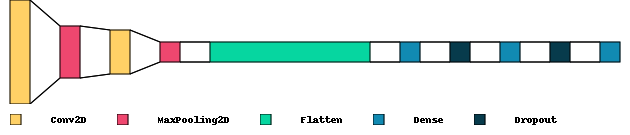

In [8]:
print(f"K{K_FOLDS} Fold cross results:")
print("Accuracy:", np.mean(scores) * 100)
print("Std:",      np.std(scores) * 100)
print("K value:", len(scores))
visualkeras.layered_view(models[0], legend=True, draw_volume=False,spacing=30)

In [14]:
# predicting on test set
y_pred = np.argmax(models[0].predict(X_test), axis=-1)

# computing confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)

# visualizing confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

313/313 [==============================] - 1s 3ms/step


TypeError: Singleton array 7 cannot be considered a valid collection.